# Employee Exit Surveys Analysis

In this project the datasets used will be the [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Further Education (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) institute in Queensland, Australia. Some slight modifications to the dataset were made as the encoding was changed to `UTF-8`.
The goal of the project is to answer the question:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The columns that will be used from the `dete_survey.csv` are:

- `ID`: An id used to identify the participants of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

The columns that will be used from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- ` Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
#display NaN values for dete_survey
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

In [5]:
#display NaN values for tafe_survey
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

First look at the two data sets:

- Many columns for both data sets contain a `NaN` values
- Some columns in date_survey have a value labeled `Not Stated` which are missing values but not labeled as `NaN`
- Some columns in tefe_survey have a value labeled `-` which are missing values but not labeled as `NaN`


# Identify Missing Values and Drop Unnecessary Columns

Stated previously in our observation, some of the values in the `dete_survey` table are stated as `Not Stated`. Below is the process in removing those values and replacing them with `NaN` to clean some of the data. We'll also drop some columns that won't be used in the analysis later on.

In [6]:
#replacing the "Not Stated" values with NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [7]:
#dropping columns for the respective survey and storing in a new variable
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Clean Column Names

The next process is to clean and standardize column names from both data sets in order to combine them later. 

In [8]:
#removing from the columns trailing whitespace, changing to lowercase, and
#replacing spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')

#checking to see the changes are correct
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
#updating column names
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID':'id',
                                                         'CESSATION YEAR':'cease_date',
                                                         'Reason for ceasing employment':'separationtype',
                                                         'Gender. What is your Gender?':'gender',
                                                         'CurrentAge. Current Age':'age',
                                                         'Employment Type. Employment Type':'employment_status',
                                                         'Classification. Classification':'position',
                                                         'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                                                         'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'})
#check columns
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the data

Below we see that there are different Resignation types for the `dete_survey_updated` data set and only one for the `tafe_survey_updated` data set, when checking the `separationtype` column for both data sets. To manipulate the data more easily, we'll combine the different resignation types to only have a single value. Once that process is complete, we'll create a new data set from each survey that only contains the value "Resignation" (for this project we'll only focus on those rows).

In [10]:
#checking unique values in dete_survey_updated
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
#checking unique values in tafe_survey_updated
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
#convert all values which contains 'Resignation' into a single value within the column
dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str.get(0)
#checking the combination worked
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
#rows with value "Resignation" separated into a different data set variable
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

# Verify the Data

We'll now focus on verifying the `cease_date` and `dete_start_date` columns make sense. We'll change the values for the `cease_date` column within `dete_resignation` to a float type containing the year. Afterwards we sort the values into a descending order from the date. From there, we drop any outliers that we see.

In [14]:
#Finding unique values within the column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [15]:
#converting the cease_date column into float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)

In [16]:
#sorting dates by ascending order
dete_resignations_sorted = dete_resignations['cease_date'].value_counts().sort_index()

dete_resignations_sorted

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

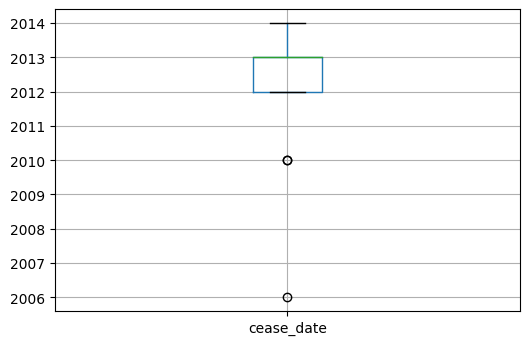

In [17]:
#plotting a box plot of the column to confirm the results from the sorted column above
dete_resignations.boxplot(column='cease_date')

In [18]:
#based on the results 2006 seems to be an outlier year so we'll drop it
dete_resignations['cease_date'] = dete_resignations['cease_date'][dete_resignations.cease_date != 2006.0]


In [19]:
#checking the drop happened
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
Name: cease_date, dtype: int64

# Create a New Column

`Tafe_resignations` has a service column called `institute_service`. In order to compare the two data sets, we create a new column in `dete_resignations` called `institute_service`.

In [20]:
#creatinga new column to match with the tafe_resignation institute_service column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [21]:
#print the first couple rows and inspect new column
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


# Identify Dissatisfied Employees

A new column called `dissatisfied` will be created for both tafe_resignations and dete_resignations. The column will have a `True` value if any of the chosen columns matches `True`. This column will indicate if the employee is dissatisfied for any reason. `True` represents that the person resigned from dissatisfaction with their job. `False` represents that the person resigned because of another reason than dissatisfaction with their job. `NaN` indicates a missing value. 

Columns in `tafe_resignations`:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

Columns in `dete_resignations`:

- `job_dissatisfaction`
- `dissatisfaction_with_the_department
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [22]:
#checking unique values in 'Contributing Factors. Dissatisfaction' keeping NaN values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
#checking unique values in 'Contributing Factors. Job Dissatisfaction' keeping NaN values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
#create definition to make sure both of the above columns have matching results and getting rid of '-' values
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [25]:
#apply new map to the columns in tafe_resignations
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [26]:
# create a new column 'dissatisfied' to return a True value from chosen columns
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [27]:
#create copy and check new column and making sure the results are either True, False, or NaN
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
#using same techniques above, doing same to the dete_resignations dataframe
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

#make copy
dete_resignations_up = dete_resignations.copy()

#display values in dissatisfied column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [29]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

# Combine the Data

Now we combine the two data sets. We'll also remove any columns that we don't have over 500 non-null values, as those columns are no longer needed for the final analysis.

In [30]:
#create institute column that have a value that identifies where the data is from
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#combining the data set
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [31]:
#viewing new combined data set
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           634 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [32]:
#remove columns that have non-null values under 500, adding '.copy' to avoid a SettingwithCopy Warning
combined_updated = combined.dropna(axis = 1, thresh=500).copy()

#view first couople rows of new updated dataframe
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


# Clean the Service Column

To clean the `institute_service` column, because it has values in different forms, we'll change the numbers into categories. We base these categories on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), understanding employee's needs according to career stage instead of age.

The  definitions are:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [33]:
#checking unique values in institute_service column
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   89
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [34]:
#extract years of service from each value of institute_service column
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract('(\d+)').astype(float)

#checking updated column
combined_updated['institute_service'].value_counts(dropna=False).sort_index()

0.0      19
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      89
Name: institute_service, dtype: int64

In [35]:
#create function for our categories and distributing the values to correct category

def set_category(value):
    if value < 3:
        return 'New'
    elif value <= 6:
        return 'Experienced'
    elif value <= 10:
        return 'Established'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'Veteran'
#create new column where categories are assigned    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(set_category)
#check new column
combined_updated['service_cat'].value_counts(dropna=False)

New            192
Experienced    172
Veteran        136
NaN             89
Established     62
Name: service_cat, dtype: int64

# Clean Age Column

Using the same techniques above, we'll clean the `age` column by splitting the ages into ranges and then separating them into their respective one. 

The categories will be:

- 20 or younger
- 21-25
- 26-30
- 31-35
- 36-40
- 41-45
- 46-50
- 51-55
- 56 or more

In [42]:
#checking values in age column
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

In [43]:
#covert age column into a float and extract age values
combined_updated['age'] = combined_updated['age'].astype(str).str.extract('(\d+)').astype(float)

#check values after change
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [47]:
#create function to separate ages into respective ranges
def age_range(age):
    if age <= 20:
        return '20 or younger'
    elif age <= 25:
        return '21-25'
    elif age <= 30:
        return '26-30'
    elif age <= 35:
        return '31-35'
    elif age <= 40:
        return '36-40'
    elif age <= 45:
        return '41-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '51-55'
    elif pd.isnull(age):
        return np.nan
    else:
        return '56 or older'

#create new column and apply function
combined_updated['age_range'] = combined_updated['age'].apply(age_range)
#check to see function is applied
combined_updated['age_range'].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age_range, dtype: int64

# Analysis on Dissatisfaction

We first fill in the missing pieces of the `dissatisfied` column and then aggregate the data. Then we create a pivot table to calculate the mean of the column and then display the results in a bar plot.

In [36]:
#check dissatisfied column and see how many missing values there are
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
#fill missing values with the value that occurs the most within the column
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

#checking values are updated
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

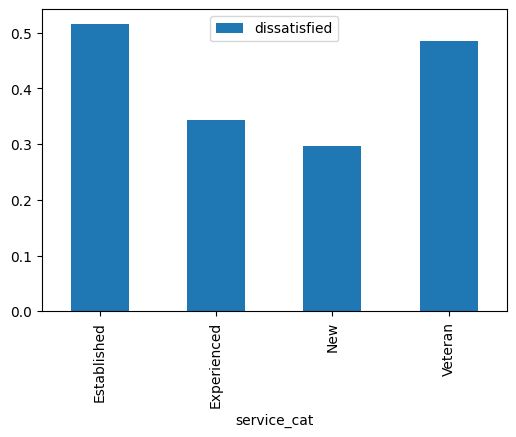

In [39]:
#create pivot table to calculate the percentage of dissatisfied employees in each service_cat group
dissatisfied_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#dispaly plot command
%matplotlib inline
#creating bar plot
dissatisfied_pivot.plot(kind='bar')

From the bar plot we see that the over half of the `Established` employees are dissatisfied with their job. The second most seems to be `Veteran`. Whats interesting is that the longer an employee stays within the company, the higher the chance an employee will be dissatisfied with their job. There could be a multitude of reasons such as promotion opportunities, pay, long-term employee benefits, etc.

# Analysis on Age

We'll use the same techniques that we did for the `dissatisfied` column for the `age` column.

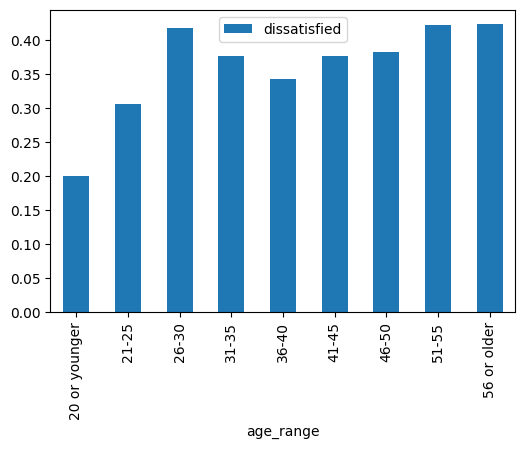

In [50]:
#creating age pivot table
age_pivot = combined_updated.pivot_table(index='age_range', values='dissatisfied')

#dispaly plot command
%matplotlib inline
#creating bar plot
age_pivot.plot(kind='bar')

We see from the bar plot that the 3 highest age ranges that are dissatisfied are `26-30`, `51-55`, and `56 or older`. There doesn't seem to be some kind or direct correlation with dissatisfaction compared to age, except that the general trend is still dissatisfaction increases as age increases.

# Analysis on Ages Compared to Work Experience

We'll create plots to see the different ages in respect to work experience, and their dissatisfaction

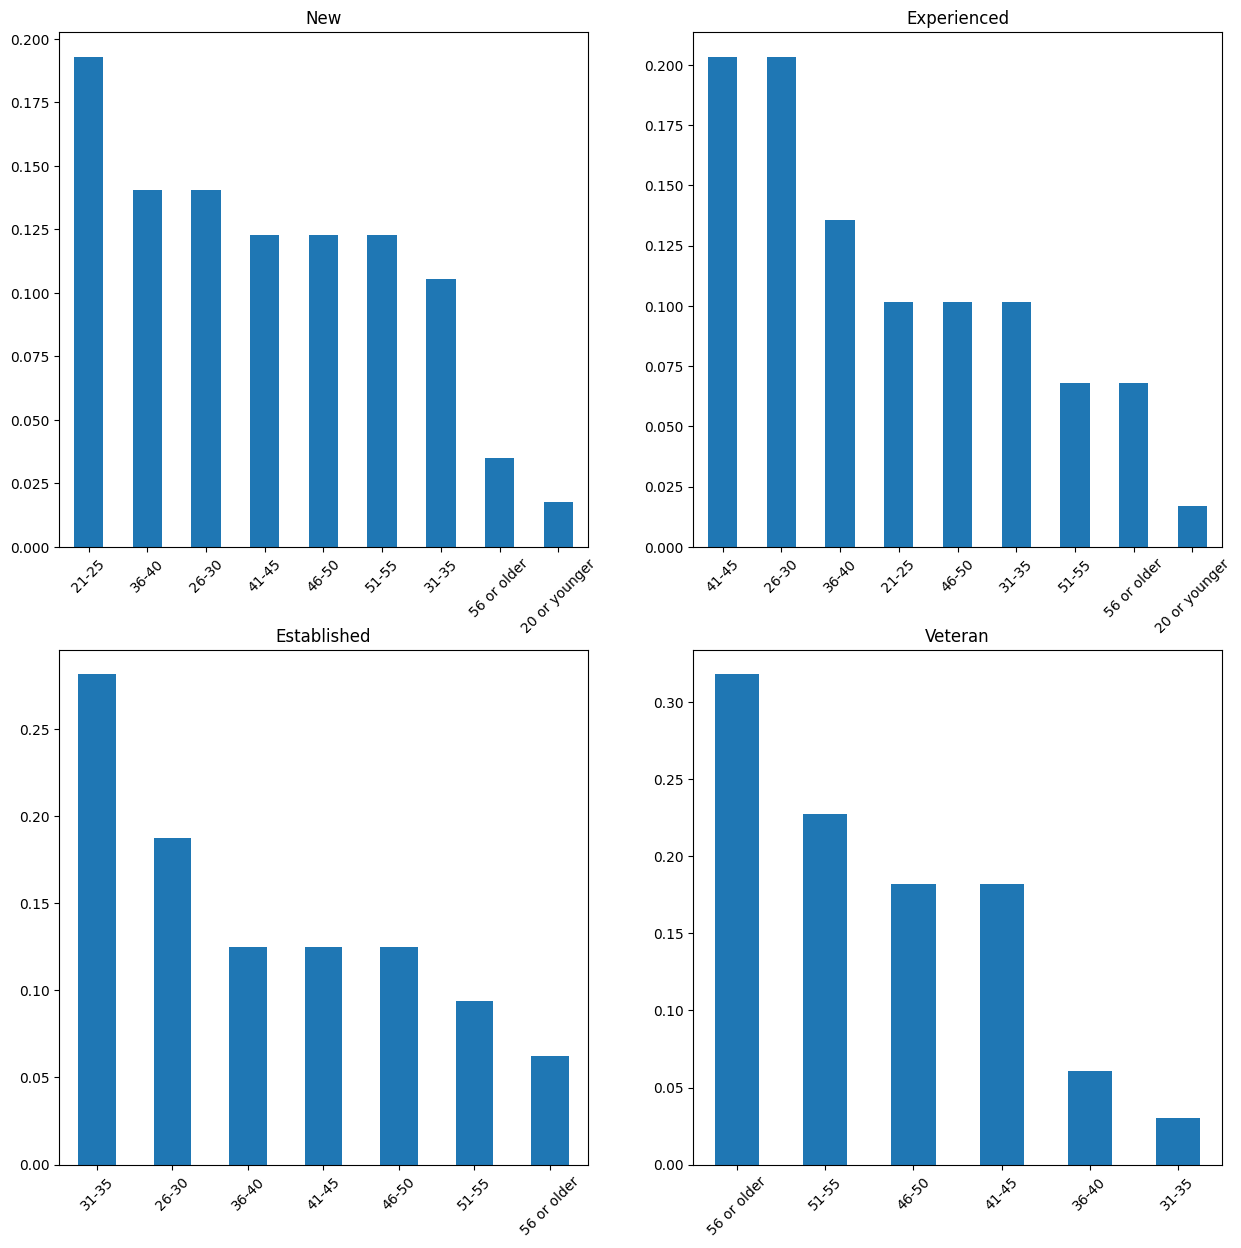

In [56]:
#import matplotlib liblary
import matplotlib.pyplot as plt

#creating plots
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
(combined_updated[(combined_updated['service_cat'] == 'New') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('New')

plt.subplot(2,2,2)
(combined_updated[(combined_updated['service_cat'] == 'Experienced') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Experienced')

plt.subplot(2,2,3)
(combined_updated[(combined_updated['service_cat'] == 'Established') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Established')

plt.subplot(2,2,4)
(combined_updated[(combined_updated['service_cat'] == 'Veteran') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Veteran')

plt.show()

For the `New` employees:

- 21-25 seems to be the range that has the highest dissatisfaction turnover
- '56 or older' and '20 or younger' have the lowest dissatisfaction turnover
- the other age ranges are all around the middle of the pack with between 11%-14%

For the `Experienced` employees:

- 41-45 and 26-30 have the highest dissatisfaction turnover
- '20 or younger' have the youngest dissatiscation turnover
- the other age ranges hover from 7%-14% in dissatisfaction

For the `Established` employees:

- 31-35 is the age range with the highest dissatisfaction turnover
- the next highest is 26-30 with a value of around 18.5%
- the other age ranges with that experience level are 13% or under

For the `Veteran` employees:

- theres a trend as the higher the age range, the more the employees are dissatisfied
- there is a big value difference from '56 or older' with 31-35 of about 30%

When considering these values, you also have to consider how many employees of a certain age group are actually within that experience level. For example, the higher the experience level, the less likely they are younger, so they'll have lower values for younger age ranges.

# Conclusion and Next Steps

The questions we tried to answer from this project are: 

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For the first question, there seems to be a correlation, as the higher the work experience, the more likely that the employee will be dissatisfied. As for a relationship to age, there doesn't seem to be a direct correlation or trend at first glance. Some next steps that could be done are to analyze each survey individually, and to decide on handling the rest of the missing values from the data.